Q 1) Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import numpy as np

In [2]:
sales = pd.read_csv(r"C:\Users\Aruna\Desktop\Assgnmnts-DS\Decision Tree-14\Company_Data.csv")

In [3]:
sales.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
# converting continuous values into categorical values
sales["Sales"] = pd.cut(sales.Sales, bins =3 , labels = ['low','medium','high'])

In [5]:
sales

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,high,111,48,16,260,83,Good,65,10,Yes,Yes
2,medium,113,35,10,269,80,Medium,59,12,Yes,Yes
3,medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,Good,33,14,Yes,Yes
396,medium,139,23,3,37,120,Medium,55,11,No,Yes
397,medium,162,26,12,368,159,Medium,40,18,Yes,Yes
398,medium,100,79,7,284,95,Bad,50,12,Yes,Yes


In [6]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
sales['Sales'] = encode.fit_transform(sales['Sales'])
sales['ShelveLoc'] = encode.fit_transform(sales['ShelveLoc'])
sales['Urban'] = encode.fit_transform(sales['Urban'])
sales['US'] = encode.fit_transform(sales['US'])

In [7]:
sales

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,2,139,23,3,37,120,2,55,11,0,1
397,2,162,26,12,368,159,2,40,18,1,1
398,2,100,79,7,284,95,0,50,12,1,1


In [8]:
# def level(sales):
#     if sales <=5.0:
#         return "low"
#     elif (sales > 5.0 and sales <= 10.5):
#         return "medium"
#     else:
#         return "high"

In [9]:
#sales["slevel"]= sales["Sales"].apply(level)

In [10]:
# Splitting data into X,Y
x = sales.iloc[:,1:]
y = sales.iloc[:,0]    

# preaping model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [12]:
# fitting model
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=30, random_state=0)

In [13]:
model = DecisionTreeClassifier()
model = model.fit(x_train,y_train)

In [14]:
model

DecisionTreeClassifier()

In [15]:
# predicting the model with x_test
y_pred = model.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score,classification_report

In [17]:
acuuracy = accuracy_score(y_test,y_pred)
print('Accuracy:',acuuracy*100)

Accuracy: 56.666666666666664


In [18]:
cls_report = classification_report(y_test,y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.46      0.67      0.55         9
           2       0.69      0.50      0.58        18

    accuracy                           0.57        30
   macro avg       0.55      0.61      0.57        30
weighted avg       0.60      0.57      0.57        30



In [19]:
from sklearn import tree
from sklearn.tree import plot_tree

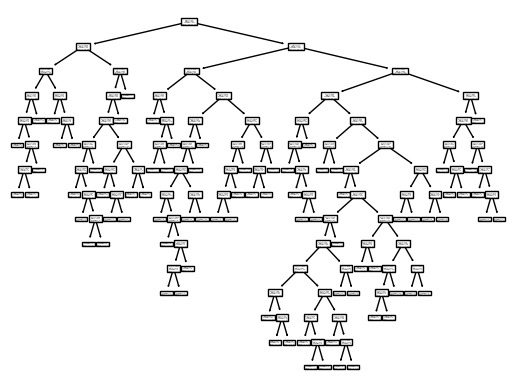

In [20]:
tree=plot_tree(model)

# model build with Entropy

In [21]:
model1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = None)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

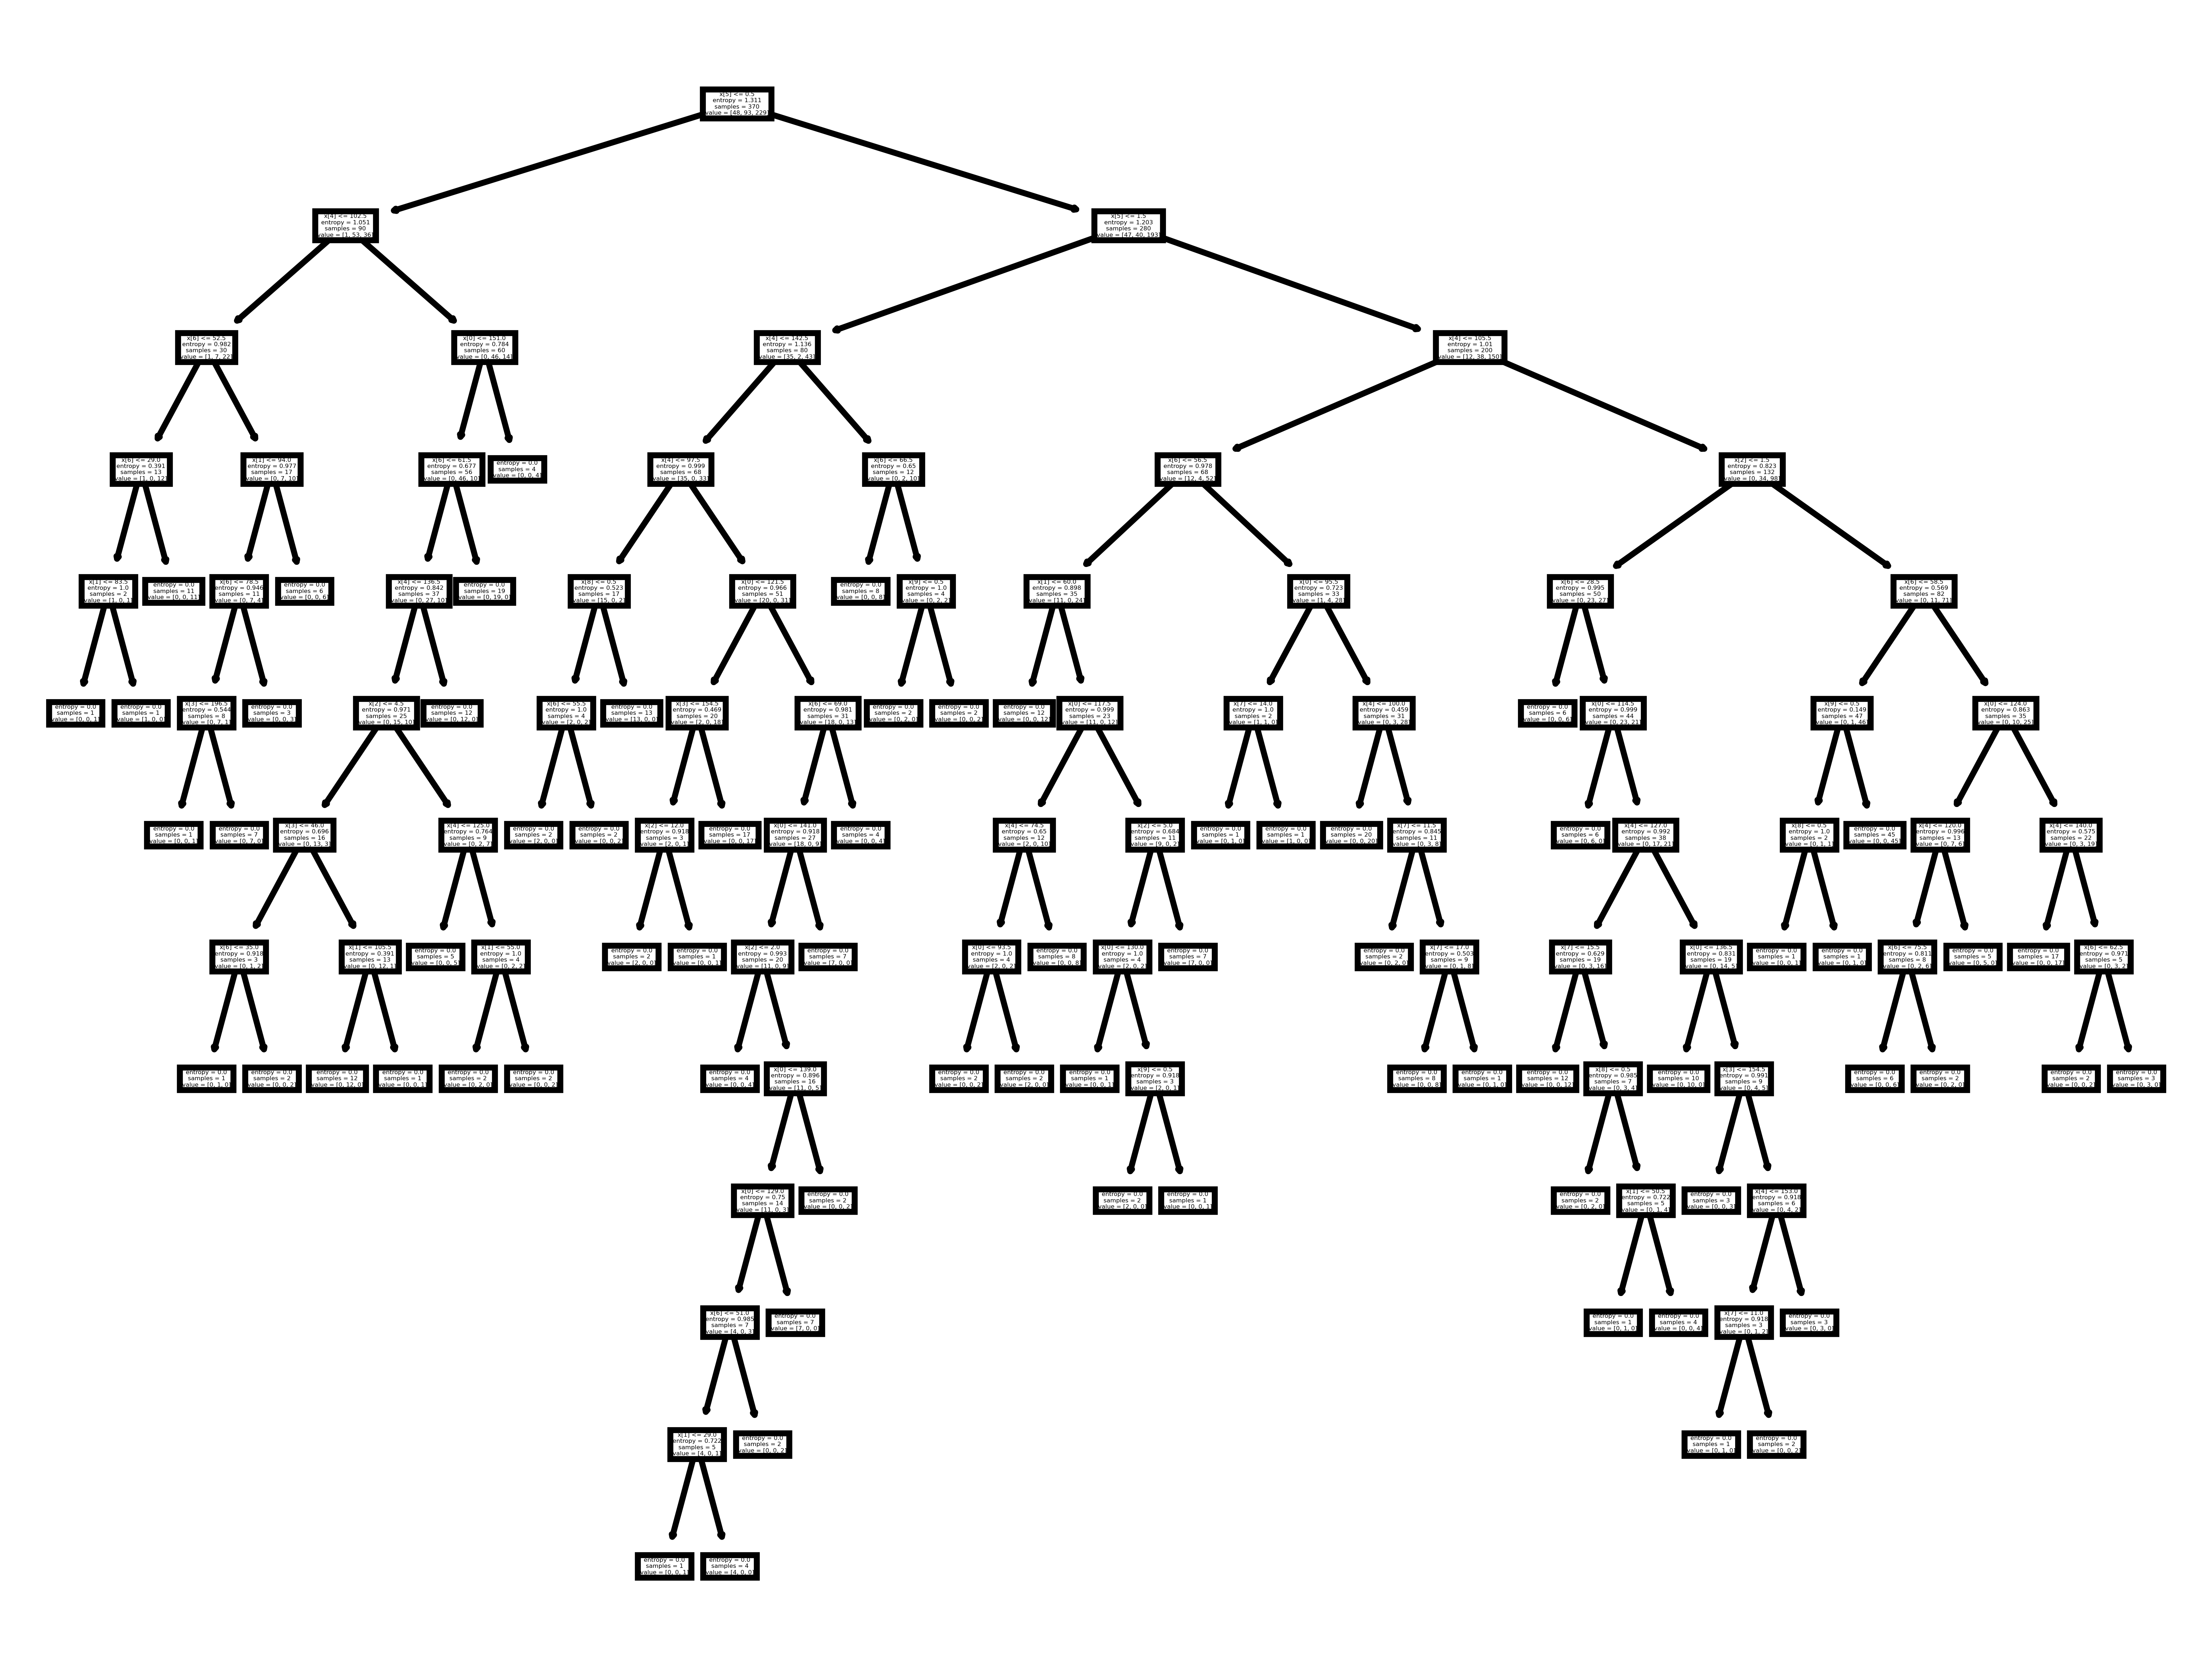

In [25]:
#PLot the decision tree
import matplotlib.pyplot as plt
plt.figure(dpi=1200)
tree1 = plot_tree(model1)

Q 2) Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [32]:
import pandas as pd
import numpy as np

In [33]:
fraud = pd.read_csv(r"C:\Users\Aruna\Desktop\Assgnmnts-DS\Decision Tree-14\Fraud_check.csv")

In [34]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [35]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [36]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [37]:
def level(fraud):
    if fraud <= 30000 :
        return "Risky"
    else:
        return "Good"

In [38]:
fraud["Taxable_Income"] = fraud['Taxable.Income'].apply(level)

In [39]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [40]:
# Applying dummies for converting categoricals values into continuous values 
fraud1 = pd.get_dummies(fraud,drop_first=True)

In [41]:
fraud1.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Taxable_Income_Risky
0,68833,50047,10,0,0,1,1,0
1,33700,134075,18,1,0,0,1,0
2,36925,160205,30,0,1,0,1,0
3,50190,193264,15,1,0,1,1,0
4,81002,27533,28,0,1,0,0,0


In [43]:
fraud2 = fraud1.drop(columns='Taxable.Income',axis=1)

In [44]:
fraud2.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Taxable_Income_Risky
0,50047,10,0,0,1,1,0
1,134075,18,1,0,0,1,0
2,160205,30,0,1,0,1,0
3,193264,15,1,0,1,1,0
4,27533,28,0,1,0,0,0


# Prearing a Decision Tree model

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [46]:
# splitting data into x,y
x = fraud2.iloc[:,0:-1]
y = fraud2.iloc[:,-1]

In [47]:
# splitting into x_train and y_train
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=30, random_state=0)

In [48]:
# Fitting model
model1 = DecisionTreeClassifier()
model1 = model1.fit(x_train,y_train)

In [49]:
model1

DecisionTreeClassifier()

# Predictions on x_test,x_train

In [50]:
# predicting with X_test values
y_test_pred = model1.predict(x_test)

In [51]:
y_train_pred = model1.predict(x_train)

In [53]:
# For calculating Accuracy score and classification report importing
from sklearn.metrics import accuracy_score,classification_report

In [55]:
# Finding accuracy for test data
test_accuracy = accuracy_score(y_test,y_test_pred)
print('Test Accuracy:',test_accuracy*100)

Test Accuracy: 56.666666666666664


In [56]:
# Finding accuracy for train data
train_accuracy = accuracy_score(y_train,y_train_pred)
print('Train Accuracy:',train_accuracy*100)

Train Accuracy: 100.0


In This model, model traing accuracy is 100 is good and test accuracy is 56. After certain score of model test accuracy is breaking in to down.

In [57]:
# Classification Report for test data
test_clsr = classification_report(y_test,y_test_pred)
print(test_clsr)

              precision    recall  f1-score   support

           0       0.58      0.82      0.68        17
           1       0.50      0.23      0.32        13

    accuracy                           0.57        30
   macro avg       0.54      0.53      0.50        30
weighted avg       0.55      0.57      0.52        30



In [58]:
# Classification Report for train data
train_clsr = classification_report(y_train,y_train_pred)
print(train_clsr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       459
           1       1.00      1.00      1.00       111

    accuracy                           1.00       570
   macro avg       1.00      1.00      1.00       570
weighted avg       1.00      1.00      1.00       570



In [59]:
from sklearn import tree
from sklearn.tree import plot_tree

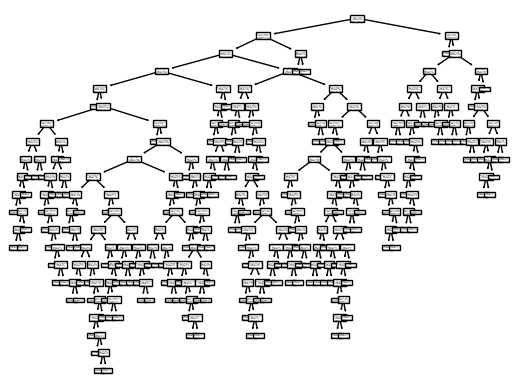

In [61]:
tree=plot_tree(model1,max_depth=100)